# CC 3230( AI  and Machine Learning Lab.)
Date:- 18.04.2022( 9:00 - 10:30 AM)
Week-10
Technique: Ensemble Learning
Problem: Bagging and Decision Trees

Name: Ananya Agrawal

Registration Number: 199303010

#### Title: CC3230 A-1

Submission Date: 18/04/2022

### Ensemble Learning:
It a combination of base learners in either parallel(Bagging) or in sequence(Boosting).

### To Do:

create some demo numerical data -- random

use single decision tree

ensemble classifier

and then ensemle using knn classifier

observe accuracy, precision 

recall, f1 score, --- all from a confusion matrix

### Steps:

step 1: Data Preparation (make moons)

step 2: Split the data into Train and Test

step 3: Use a decision tree classifier and report the accuracy

step 4: Use Bagging Classifier (base is deicison classifier) and report accuracy

step 5: Use bagging classifier over diff base classifier and report accuracy
(can use knn classfifier)


### Data Preparation

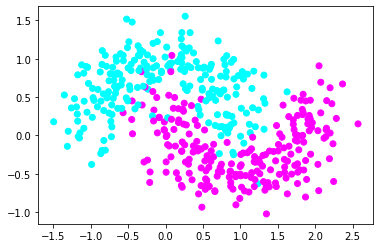

In [14]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
 
X, y = make_moons(n_samples=450, noise=.25, random_state=0)

## Splitting the data into training and testing
Xtrn, Xtst, ytrn, ytst = train_test_split(X, y, test_size=0.33)

plt.scatter(X[:,0], X[:,1], c=y, cmap='cool')

### Decision Tree Classfier

In [29]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(max_depth=7) ## decision is taken at 7th depth itself
estimator.fit(Xtrn, ytrn)

ypred = estimator.predict(Xtst)

## Reporting Accuracy of Decision Tree Classifier

print("Accuracy: " + str(accuracy_score(ytst, ypred)))

Accuracy: 0.912751677852349


### Bagging Classfier on base classifier as Decision Tree

In [33]:
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier(max_depth=6) ## decision is taken at 6th depth
bag_ens = BaggingClassifier(base_estimator=base_estimator, n_estimators=500, 
                            max_samples=100, oob_score=True)
bag_ens.fit(Xtrn, ytrn)
ypred = bag_ens.predict(Xtst)

### Accuracy of Bagging Classifier on a base of Decision Tree Classifier

print("Out of Bag Score: " + str(bag_ens.oob_score_))
print("Accuracy: " + str(accuracy_score(ytst, ypred)))

Out of Bag Score: 0.9269102990033222
Accuracy: 0.9328859060402684


### Bagging Classifier on a different base classifier such as KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

base_estimator = KNeighborsClassifier(n_neighbors=8) ### Decision is taken at 8th neighbour
bag_ens = BaggingClassifier(base_estimator=base_estimator, n_estimators=500, 
                            max_samples=100, oob_score=True)
bag_ens.fit(Xtrn, ytrn)
ypred = bag_ens.predict(Xtst)

### Calculating Accuracy using a different base classifier such as KNN

print("Out of Bag Score: " + str(bag_ens.oob_score_))
print("Accuracy: " + str(accuracy_score(ytst, ypred)))

Out of Bag Score: 0.9568106312292359
Accuracy: 0.9261744966442953
